In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, RandomFlip, Dropout, InputLayer, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from keras.regularizers import L2
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import keras

In [2]:
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

def load_preprocess():
    # Loading the cifar-10 dataset
    (trainX, trainY), (testX, testY) = cifar10.load_data()

    # Converting to float and normalizing the pixels
    trainX = trainX.astype('float32')
    trainX = trainX / 255.0
    testX = testX.astype('float32')
    testX = testX / 255.0

    # Applying one-hot encoding to the lables
    trainY = to_categorical(trainY)
    testY = to_categorical(testY)
    
    return trainX, trainY, testX, testY

In [3]:
def get_model():
    model = Sequential([
        InputLayer(input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        Dropout(0.2),
        Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        Conv2D(128, (2, 2), activation='relu', kernel_initializer='he_uniform', padding='same'),
        Dropout(0.5),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu', kernel_initializer='he_uniform',kernel_regularizer=L2(0.001)),
        Dense(10, activation='softmax')
    ])

    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [4]:
BATCH_SIZE = 128
train_x, train_y, test_x, test_y = load_preprocess()

model = get_model()
generator = ImageDataGenerator(zoom_range=[0.8,1.2], rotation_range=15, width_shift_range=.17, height_shift_range=.17, horizontal_flip=True)
train_iterator = generator.flow(train_x, train_y, batch_size=BATCH_SIZE)
steps=int(train_x.shape[0]/BATCH_SIZE)
history = model.fit_generator(train_iterator,steps_per_epoch=steps,epochs=40,validation_data=(test_x,test_y),callbacks=EarlyStopping(monitor='val_loss',min_delta=0.1,patience=10,mode='auto',restore_best_weights=True)) 

170508288/170498071 [==============================] - 2s 0us/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/40
390/390 [==============================] - 39s 65ms/step - loss: 1.9924 - accuracy: 0.3222 - val_loss: 1.7875 - val_accuracy: 0.4579
Epoch 2/40
390/390 [==============================] - 26s 67ms/step - loss: 1.5945 - accuracy: 0.4543 - val_loss: 1.4702 - val_accuracy: 0.5499
Epoch 3/40
390/390 [==============================] - 25s 65ms/step - loss: 1.4142 - accuracy: 0.5166 - val_loss: 1.3175 - val_accuracy: 0.5703
Epoch 4/40
390/390 [==============================] - 25s 63ms/step - loss: 1.2721 - accuracy: 0.5684 - val_loss: 1.1894 - val_accuracy: 0.6257
Epoch 5/40
390/390 [==============================] - 25s 64ms/step - loss: 1.1878 - accuracy: 0.5965 - val_loss: 1.0919 - val_accuracy: 0.6474
Epoch 6/40
390/390 [==============================] - 25s 64ms/step - loss: 1.1123 - accuracy: 0.6259 - val_loss: 0.9773 - val_accuracy: 0.6935
Epoch 7/40
390/390 [==============================] - 25s 64ms/step - loss: 1.0424 - accuracy: 0.6527 - val_loss: 0.9382 - val_accuracy:

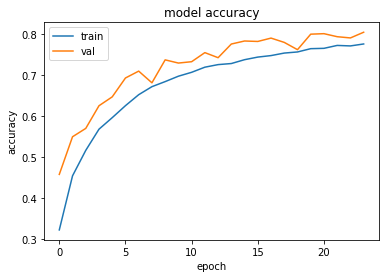

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()